<a href="https://colab.research.google.com/github/Achu0015/PADHAI/blob/master/MPNeuronAndPerceptronModels.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading Data**

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [13]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [0]:
import pandas as pd

In [0]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target

In [16]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [19]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [20]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# **Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('class', axis=1)
Y = data['class']

In [50]:
type(X)

pandas.core.frame.DataFrame

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y)

In [52]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(569, 30) (512, 30) (57, 30)
(569,) (512,) (57,)


In [53]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [54]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state=1)

In [0]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

# **Binarisation of input**

In [0]:
import matplotlib.pyplot as plt

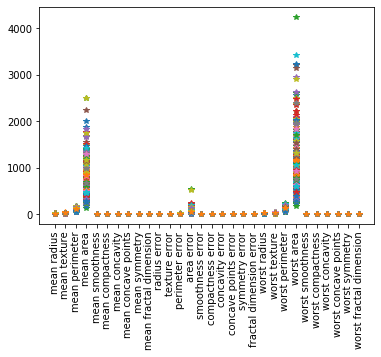

In [56]:
plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

In [60]:
plt.plot(x_binarised_3_train, '*')

NameError: ignored

In [0]:
#to apply for each every feature use Pandas library function cut

X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

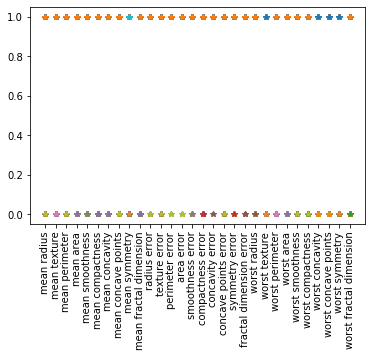

In [62]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

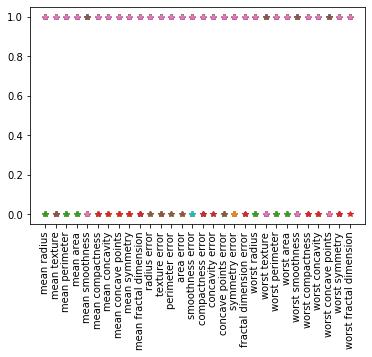

In [64]:
plt.plot(X_binarised_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [65]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [0]:
# Converting dataFrames to numpys
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [67]:
type(X_binarised_test)

numpy.ndarray

# **MP Neuron Model**

In [0]:
from random import randint

In [69]:
# Intialising Randomly the threshold
b = 3 

i = randint(0, X_binarised_train.shape[0])

print('For row', i)

if (np.sum(X_binarised_train[100, :]) >= b):
  print('MP nueron inference is Malignant')
else:
  print('MP nueron inference is Benign')

if(Y_train[i]==1):
  print('Ground Truth is Malignant')
else:
  print('Ground Truth is Benign')

 # Goal is approximate value of b for which most inferences would be correct 

For row 67
MP nueron inference is Malignant
Ground Truth is Malignant


In [70]:
b = 3

Y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train, Y_train):
  y_pred = (np.sum(x) >= b) #Inference of model
  Y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred) # comparing ground truth

print(accurate_rows, accurate_rows/X_binarised_train.shape[0])


321 0.626953125


In [71]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b) #Inference of model
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred) # comparing ground truth

  print(b, accurate_rows/X_binarised_train.shape[0])

# By looking at each increasing iteration the model is not doing better in any way. To know whats happening,
# let's dig into Data Analysis: Look at Mean data by 'class'
# Observation: when it is Benign(0) it turns out that feature value is larger than in case with Malignant (1)
# Doing Binarisation is not good in this case, so we flip the labels in binarisation 
# The feature having smaller value contribute more for Malignant
#

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.62890625
14 0.634765625
15 0.638671875
16 0.642578125
17 0.650390625
18 0.65625
19 0.6640625
20 0.66796875
21 0.69140625
22 0.7109375
23 0.7421875
24 0.76953125
25 0.80859375
26 0.826171875
27 0.84375
28 0.84375
29 0.826171875
30 0.755859375


In [0]:
from sklearn.metrics import accuracy_score

In [73]:
b = 28
Y_pred_test = []

for x in X_binarised_test:
  y_pred = (np.sum(x) >= b) #Inference of model
  Y_pred_test.append(y_pred)
accuracy = accuracy_score(Y_pred_test, Y_test)


print(b, accuracy)


28 0.631578947368421


# **MP Neuron Class**

In [0]:
class MPNeuron:

  def __init__(self):
    self.b = None

  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y):
    accuracy = {}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print("Optimal value of b is:", best_b)
    print('Highest Accuracy is:', accuracy[best_b])

In [75]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is: 27
Highest Accuracy is: 0.84375


In [0]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [77]:
print(accuracy_test)

0.7192982456140351


# **Perceptron Class**

$y=1, if\sum_i w_i x_i >= b


In [0]:
X_train = X_train.values
X_test = X_test.values

In [0]:
class Perceptron:
  
  def __init__(self):
    self.w = None
    self.b = None

  
  def model(self, x): # Given x compute y
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0

    wt_matrix = []

    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        if y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
        
      wt_matrix.append(self.w) 
      
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if accuracy[i] > max_accuracy:
        max_accuracy = accuracy[i]
        chkptw = self.w # Purpose of checkpointing is to keep track of maximum accuracy
        chkptb = self.b
    self.w = chkptw
    self.b = chkptb
    print(max_accuracy)

    plt.plot(np.fromiter(accuracy.values(), dtype=float))
    plt.ylim([0,1])
    plt.show()
    return np.array(wt_matrix)

# Learning rate is used to smoothen the up's down's, and it's fraction bewteen 0 and 1

In [0]:
perceptron = Perceptron()

0.921875


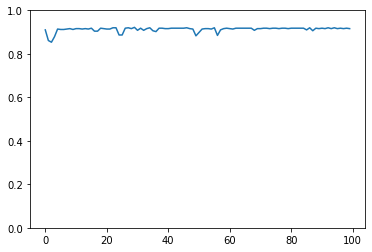

In [209]:
# Here epochs are hyper parametee, as this defines the accuracy of model even though it is not directly used in Model as parameter
wt_matrix = perceptron.fit(X_train, Y_train, 100)

In [0]:
plt.plot(perceptron.w)
plt.show()

In [190]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.921875


In [186]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9473684210526315


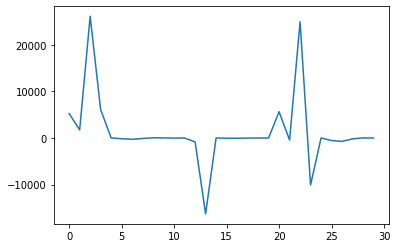

In [211]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

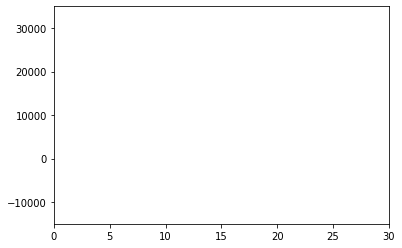

In [219]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 35000))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [223]:
HTML(anim.to_html5_video())